In [37]:
from src.utils.data_utils import load_dataframe_from_csv
from src.data.dataloader import load_initial_dataset
from clean_cmu import clean_movies_cmu
#from config import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
movie = load_dataframe_from_csv('movie_cmu.csv')
character = load_dataframe_from_csv('character.csv')
plot_summaries = load_dataframe_from_csv('plot_summaries.csv')
tvtropes = load_dataframe_from_csv('tvtropes.csv')
name_clusters = load_dataframe_from_csv('name_clusters.csv')
oscar_winning_films = load_dataframe_from_csv('oscar_winning_films_ids.csv')
oscar_winning_actors = load_dataframe_from_csv('oscar_winning_actors.csv')
oscar_winning_actresses = load_dataframe_from_csv('oscar_winning_actresses.csv')
oscar_supporting_actors = load_dataframe_from_csv('oscar_winning_supporting_actors.csv')
oscar_supporting_actresses = load_dataframe_from_csv('oscar_winning_supporting_actresses.csv')
extended_films = load_dataframe_from_csv('film_2015_2024.csv')
academy_award_winning_films = load_dataframe_from_csv('acedemy_award_winning_films')
winning_actors_info = load_dataframe_from_csv('winning_actors_information.csv')

In [39]:
extended_films["Movie genres"] = extended_films["genres"]
extended_films["Movie release date"] = extended_films["release_date"]
extended_films["Movie languages"] = extended_films["languages"]
extended_films["Movie countries"] = extended_films["countries"]
extended_films["Movie name"] = extended_films["film"]
extended_films["Movie box office revenue"] = extended_films["box_office"]
extended_films["Movie runtime"] = extended_films["runtime"]
extended_films["Wikipedia movie ID"] = extended_films["page_id"]
extended_films = extended_films.drop(columns=["genres", "release_date", "languages", "countries", "release date", "film", "box_office", "runtime", "page_id"])

In [40]:
winning_actors_info

page_id wikidata_id                 actor sexLabel nativeLanguageLabel  \
0      106405      Q77181         Emil Jannings     male                 NaN   
1      142784     Q312073         Warner Baxter     male             English   
2     7605117     Q182229         George Arliss     male                 NaN   
3       67022     Q295593      Lionel Barrymore     male             English   
4      142834     Q322179         Wallace Beery     male             English   
..        ...         ...                   ...      ...                 ...   
312   3762237     Q220901            Laura Dern   female    American English   
313  26143279     Q491013         Youn Yuh-jung   female              Korean   
314  51868604   Q27733932         Ariana DeBose   female             English   
315     68378     Q106997      Jamie Lee Curtis   female             English   
316  35719670    Q5243751  Da'Vine Joy Randolph   female                 NaN   

    countryOfCitizenshipLabel ethnicGroupLabel  
0                     Germany              NaN  
1    United States of America              NaN  
2              United Kingdom              NaN  
3    United States of America              NaN  
4    United States of America              NaN  
..                        ...              ...  
312  United States of America              NaN  
313               South Korea              NaN  
314  United States of America              NaN  
315  United States of America              NaN  
316  United States of America              NaN  

[317 rows x 7 columns]

In [41]:
character

Wikipedia movie ID Freebase movie ID  Movie release date  \
0                   975900         /m/03vyhn              2001.0   
1                   975900         /m/03vyhn              2001.0   
2                   975900         /m/03vyhn              2001.0   
3                   975900         /m/03vyhn              2001.0   
4                   975900         /m/03vyhn              2001.0   
...                    ...               ...                 ...   
450664              913762         /m/03pcrp              1992.0   
450665              913762         /m/03pcrp              1992.0   
450666            28308153        /m/0cp05t9                 NaN   
450667            28308153        /m/0cp05t9                 NaN   
450668            28308153        /m/0cp05t9                 NaN   

                    Character name  Actor date of birth  Actor gender  \
0                         Akooshay               1958.0             F   
1       Lieutenant Melanie Ballard               1974.0             F   
2              Desolation Williams               1969.0             M   
3               Sgt Jericho Butler               1967.0             M   
4                  Bashira Kincaid               1977.0             F   
...                            ...                  ...           ...   
450664                      Elensh                  NaN             F   
450665                      Hibiki               1965.0             M   
450666                         NaN               1941.0             M   
450667                         NaN                  NaN           NaN   
450668                         NaN                  NaN           NaN   

        Actor height)    Actor ethnicity          Actor name  \
0               1.620                NaN      Wanda De Jesus   
1               1.780                NaN  Natasha Henstridge   
2               1.727  African Americans            Ice Cube   
3               1.750                NaN       Jason Statham   
4               1.650                NaN         Clea DuVall   
...               ...                ...                 ...   
450664            NaN                NaN  Dorothy Elias-Fahn   
450665            NaN                NaN       Jonathan Fahn   
450666          1.730     English people      David Hemmings   
450667            NaN                NaN    Roberta Paterson   
450668            NaN                NaN         John Rogers   

        Actor age at movie release Freebase character Freebase character ID  \
0                             42.0         /m/0bgchxw            /m/0bgcj3x   
1                             27.0          /m/0jys3m            /m/0bgchn4   
2                             32.0          /m/0jys3g            /m/0bgchn_   
3                             33.0         /m/02vchl6            /m/0bgchnq   
4                             23.0         /m/02vbb3r            /m/0bgchp9   
...                            ...                ...                   ...   
450664                         NaN         /m/0kr406c            /m/0kr406h   
450665                        27.0         /m/0kr405_            /m/0kr4090   
450666                        15.0         /m/0g8ngmc                   NaN   
450667                         NaN         /m/0g8ngmj                   NaN   
450668                         NaN         /m/0g8ngmw                   NaN   

       Freebase actor ID  
0             /m/03wcfv7  
1              /m/0346l4  
2             /m/01vw26l  
3              /m/034hyc  
4              /m/01y9xg  
...                  ...  
450664         /m/0b_vcv  
450665         /m/0bx7_j  
450666         /m/022g44  
450667        /m/0g8ngmm  
450668        /m/0btz19d  

[450669 rows x 13 columns]

In [42]:
winning_actors_info

page_id wikidata_id                 actor sexLabel nativeLanguageLabel  \
0      106405      Q77181         Emil Jannings     male                 NaN   
1      142784     Q312073         Warner Baxter     male             English   
2     7605117     Q182229         George Arliss     male                 NaN   
3       67022     Q295593      Lionel Barrymore     male             English   
4      142834     Q322179         Wallace Beery     male             English   
..        ...         ...                   ...      ...                 ...   
312   3762237     Q220901            Laura Dern   female    American English   
313  26143279     Q491013         Youn Yuh-jung   female              Korean   
314  51868604   Q27733932         Ariana DeBose   female             English   
315     68378     Q106997      Jamie Lee Curtis   female             English   
316  35719670    Q5243751  Da'Vine Joy Randolph   female                 NaN   

    countryOfCitizenshipLabel ethnicGroupLabel  
0                     Germany              NaN  
1    United States of America              NaN  
2              United Kingdom              NaN  
3    United States of America              NaN  
4    United States of America              NaN  
..                        ...              ...  
312  United States of America              NaN  
313               South Korea              NaN  
314  United States of America              NaN  
315  United States of America              NaN  
316  United States of America              NaN  

[317 rows x 7 columns]

In [43]:
#winning_actors_info["Wikipedia movie ID"] = winning_actors_info["wikidata_id"]
#winning_actors_info = winning_actors_info.drop(columns=["wikidata_id"])
winning_actors_info["Actor name"] = winning_actors_info["actor"]
winning_actors_info = winning_actors_info.drop(columns=["actor"])

#winning_actors_info = pd.merge(winning_actors_info, character, on='Actor name')

In [44]:
#winning_actors_info.head(25)

In [45]:
extended_films

wikidata_id        reviewScores  \
0       Q21646407                ['']   
1       Q20311376                ['']   
2       Q24521064  ['100%', '7.7/10']   
3       Q18701869                ['']   
4       Q20770561     ['31%', '5/10']   
...           ...                 ...   
27002  Q129815195                 NaN   
27003  Q124694939                 NaN   
27004  Q122194265                ['']   
27005  Q130014181                 NaN   
27006  Q130375724                 NaN   

                                    awardsReceived awardsNominated  \
0                                             ['']            ['']   
1                                             ['']            ['']   
2      ['Sundance Special Jury Prize Documentary']            ['']   
3                                             ['']            ['']   
4                                             ['']            ['']   
...                                            ...             ...   
27002                                          NaN             NaN   
27003                                          NaN             NaN   
27004                                         ['']            ['']   
27005                                          NaN             NaN   
27006                                          NaN             NaN   

       capitalCost                         Movie genres    Movie release date  \
0              NaN                            ['drama']  2015-01-01T00:00:00Z   
1              NaN                          ['musical']  2015-01-01T00:00:00Z   
2              NaN             ['documentary', 'crime']  2015-01-24T00:00:00Z   
3              NaN          ['adventure', "children's"]  2015-01-01T00:00:00Z   
4              NaN  ['drama', 'LGBT-related', 'comedy']  2015-09-18T00:00:00Z   
...            ...                                  ...                   ...   
27002          NaN                                  NaN                   NaN   
27003          NaN                                  NaN                   NaN   
27004          NaN                                 ['']  2023-12-22T00:00:00Z   
27005          NaN                                  NaN                   NaN   
27006          NaN                                  NaN                   NaN   

        Movie languages           Movie countries                 Movie name  \
0               Kannada                     India            First Rank Raju   
1               Kannada                     India           A 2nd Hand Lover   
2               English  United States of America  3 1/2 Minutes, 10 Bullets   
3                  Urdu                  Pakistan                  3 Bahadur   
4      English, Spanish  United States of America              3 Generations   
...                 ...                       ...                        ...   
27002               NaN                       NaN                     Yudhra   
27003               NaN                       NaN    Yumi's Cells: The Movie   
27004               NaN                     India                       Yuva   
27005               NaN                       NaN                      Z-Mom   
27006               NaN                       NaN               Zebra (film)   

       Movie box office revenue Movie runtime  Wikipedia movie ID  
0                           NaN           NaN            48716179  
1                           NaN           NaN            46967307  
2                           NaN            98            48837152  
3                           NaN            94            44838624  
4                           NaN            87            46896101  
...                         ...           ...                 ...  
27002                       NaN           NaN            77719767  
27003                       NaN           NaN            76212902  
27004                       NaN           NaN            74732328  
27005                       NaN           NaN            7

In [46]:
oscar_actors_movies = movie[movie['Wikipedia movie ID'].isin(oscar_winning_actors['film_id'])]

oscar_actors_movies = pd.merge(oscar_actors_movies, oscar_winning_actors, left_on='Wikipedia movie ID', right_on='film_id')
oscar_actors_movies = oscar_actors_movies.drop(columns=["film_id"])

oscar_actors_extended = extended_films[extended_films['Wikipedia movie ID'].isin(oscar_winning_actors['film_id'])]
oscar_actors_extended = pd.merge(oscar_actors_extended, oscar_winning_actors, left_on='Wikipedia movie ID', right_on='film_id')
oscar_actors_extended = oscar_actors_extended.drop(columns=["film_id"])

oscar_actors_movies

Wikipedia movie ID Freebase movie ID                 Movie name  \
0              4836072         /m/0cq7kw               My Fair Lady   
1               163462         /m/015qtl            Harry and Tonto   
2               142443         /m/011yl_                      Shine   
3              2528212         /m/07l450  The Last King of Scotland   
4              1172795         /m/04dc58       The Way of All Flesh   
..                 ...               ...                        ...   
81               54160          /m/0f4vx          Leaving Las Vegas   
82             3213691         /m/08zrbl        There Will Be Blood   
83               99463          /m/0pd64      The French Connection   
84             1096473         /m/045pct           The Last Command   
85              369508         /m/0209hj                     Gandhi   

    Movie release date  Movie box office revenue  Movie runtime  \
0               1964.0                72000000.0          172.0   
1               1974.0                       NaN          115.0   
2               1996.0                35892330.0          105.0   
3               2006.0                48362207.0          121.0   
4                  NaN                       NaN           94.0   
..                 ...                       ...            ...   
81              1995.0                32029928.0          110.0   
82              2007.0                76181545.0          158.0   
83              1971.0                51700000.0          104.0   
84                 NaN                       NaN           88.0   
85              1982.0                52767889.0          188.0   

     Movie languages           Movie countries  \
0   English Language  United States of America   
1   English Language  United States of America   
2   English Language  United States of America   
3    French Language            United Kingdom   
4        Silent film  United States of America   
..               ...                       ...   
81  Russian Language  United States of America   
82  English Language  United States of America   
83   French Language  United States of America   
84       Silent film  United States of America   
85    Hindi Language                     India   

                                         Movie genres  Actors id  
0   Costume drama, Roadshow theatrical release, Mu...      99019  
1   Road movie, Americana, Comedy-drama, Drama, Co...     163461  
2   Biography, World cinema, Musical, Drama, Music...     171515  
3   Thriller, Docudrama, Period piece, Drama, War ...     634431  
4          Silent film, Drama, Indie, Black-and-white     106405  
..                                                ...        ...  
81  Tragedy, Erotica, World cinema, Addiction Dram...      21111  
82                  Period piece, Family Drama, Drama     171003  
83  Thriller, Crime Fiction, Detective fiction, Ch...      12561  
84  Silent film, Indie, Black-and-white, Period pi...     106405  
85  British Empire Film, History, Historical ficti...     168480  

[86 rows x 10 columns]

In [47]:
#oscar_actors_movies = pd.concat([oscar_actors_movies, oscar_actors_extended])
winning_actors_info["Actors id"] = winning_actors_info["page_id"]
winning_actors_info = winning_actors_info.drop(columns=["page_id"])

character.columns

Index(['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date',
       'Character name', 'Actor date of birth', ' Actor gender',
       'Actor height)', 'Actor ethnicity', 'Actor name',
       'Actor age at movie release', 'Freebase character',
       'Freebase character ID', 'Freebase actor ID'],
      dtype='object')

In [48]:
oscar_actors_movies = oscar_actors_movies.merge(winning_actors_info, on='Actors id')
oscar_actors_movies = oscar_actors_movies.merge(character[['Wikipedia movie ID', 'Actor name', 'Actor age at movie release', 'Actor date of birth', 'Actor ethnicity']], on=['Wikipedia movie ID', 'Actor name'])
oscar_actors_movies

Wikipedia movie ID Freebase movie ID                 Movie name  \
0              4836072         /m/0cq7kw               My Fair Lady   
1               163462         /m/015qtl            Harry and Tonto   
2               142443         /m/011yl_                      Shine   
3              2528212         /m/07l450  The Last King of Scotland   
4              1172795         /m/04dc58       The Way of All Flesh   
..                 ...               ...                        ...   
83               54160          /m/0f4vx          Leaving Las Vegas   
84             3213691         /m/08zrbl        There Will Be Blood   
85               99463          /m/0pd64      The French Connection   
86             1096473         /m/045pct           The Last Command   
87              369508         /m/0209hj                     Gandhi   

    Movie release date  Movie box office revenue  Movie runtime  \
0               1964.0                72000000.0          172.0   
1               1974.0                       NaN          115.0   
2               1996.0                35892330.0          105.0   
3               2006.0                48362207.0          121.0   
4                  NaN                       NaN           94.0   
..                 ...                       ...            ...   
83              1995.0                32029928.0          110.0   
84              2007.0                76181545.0          158.0   
85              1971.0                51700000.0          104.0   
86                 NaN                       NaN           88.0   
87              1982.0                52767889.0          188.0   

     Movie languages           Movie countries  \
0   English Language  United States of America   
1   English Language  United States of America   
2   English Language  United States of America   
3    French Language            United Kingdom   
4        Silent film  United States of America   
..               ...                       ...   
83  Russian Language  United States of America   
84  English Language  United States of America   
85   French Language  United States of America   
86       Silent film  United States of America   
87    Hindi Language                     India   

                                         Movie genres  Actors id wikidata_id  \
0   Costume drama, Roadshow theatrical release, Mu...      99019     Q181887   
1   Road movie, Americana, Comedy-drama, Drama, Co...     163461     Q182431   
2   Biography, World cinema, Musical, Drama, Music...     171515     Q166272   
3   Thriller, Docudrama, Period piece, Drama, War ...     634431     Q182763   
4          Silent film, Drama, Indie, Black-and-white     106405      Q77181   
..                                                ...        ...         ...   
83  Tragedy, Erotica, World cinema, Addiction Dram...      21111      Q42869   
84                  Period piece, Family Drama, Drama     171003     Q166389   
85  Thriller, Crime Fiction, Detective fiction, Ch...      12561     Q150943   
86  Silent film, Indie, Black-and-white, Period pi...     106405      Q77181   
87  British Empire Film, History, Historical ficti...     168480     Q173158   

   sexLabel nativeLanguageLabel countryOfCitizenshipLabel   ethnicGroupLabel  \
0      male     British English            United Kingdom                NaN   
1      male             English  United States of America                NaN   
2      male                 NaN                 Australia                NaN   
3      male             English  United States of America                NaN   
4      male                 NaN                   Germany                NaN   
..      ...                 ...                       ...                ...   
83     male             English  United States of America  Italian Americans   
84     male                 NaN            United Kingdom      Jewish people   
85     male             English  United States of America       

In [49]:
import plotly.express as px
fig = px.histogram(oscar_actors_movies, 
                   x=oscar_actors_movies["Actor age at movie release"].value_counts().index,
                   y=oscar_actors_movies["Actor age at movie release"].value_counts().values, 
                   title="Number of Oscar winning actors by age at movie release",
                   labels={'x': 'Age at Movie Release', 'y': 'actors'},
                   nbins=17)
fig.update_layout( bargap=0.1)
fig.show()

In [50]:
#fig = px.scatter_geo()


country_counts = oscar_actors_movies['countryOfCitizenshipLabel'].value_counts()
country_counts = country_counts.reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(country_counts, 
                    locations="Country", 
                    locationmode='country names', 
                    color="Count", 
                    hover_name="Country", 
                    title="Heatmap of Oscar Winning Actors by Country")
fig.update_geos(showcountries=True)
fig.show()

In [51]:
country_counts = oscar_actors_movies['countryOfCitizenshipLabel'].value_counts()
country_counts = country_counts.reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(country_counts, 
                    locations="Country", 
                    locationmode='country names', 
                    color="Count", 
                    hover_name="Country", 
                    title="Heatmap of Oscar Winning Actors by Country")
fig.update_geos(showcountries=True, visible=True)
fig.update_geos(lonaxis_range=[-10, 40], lataxis_range=[35, 70])
fig.show()

In [52]:
print(character.columns)
print(oscar_winning_actors.columns)
character

Index(['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date',
       'Character name', 'Actor date of birth', ' Actor gender',
       'Actor height)', 'Actor ethnicity', 'Actor name',
       'Actor age at movie release', 'Freebase character',
       'Freebase character ID', 'Freebase actor ID'],
      dtype='object')
Index(['Actors id', 'film_id'], dtype='object')


Wikipedia movie ID Freebase movie ID  Movie release date  \
0                   975900         /m/03vyhn              2001.0   
1                   975900         /m/03vyhn              2001.0   
2                   975900         /m/03vyhn              2001.0   
3                   975900         /m/03vyhn              2001.0   
4                   975900         /m/03vyhn              2001.0   
...                    ...               ...                 ...   
450664              913762         /m/03pcrp              1992.0   
450665              913762         /m/03pcrp              1992.0   
450666            28308153        /m/0cp05t9                 NaN   
450667            28308153        /m/0cp05t9                 NaN   
450668            28308153        /m/0cp05t9                 NaN   

                    Character name  Actor date of birth  Actor gender  \
0                         Akooshay               1958.0             F   
1       Lieutenant Melanie Ballard               1974.0             F   
2              Desolation Williams               1969.0             M   
3               Sgt Jericho Butler               1967.0             M   
4                  Bashira Kincaid               1977.0             F   
...                            ...                  ...           ...   
450664                      Elensh                  NaN             F   
450665                      Hibiki               1965.0             M   
450666                         NaN               1941.0             M   
450667                         NaN                  NaN           NaN   
450668                         NaN                  NaN           NaN   

        Actor height)    Actor ethnicity          Actor name  \
0               1.620                NaN      Wanda De Jesus   
1               1.780                NaN  Natasha Henstridge   
2               1.727  African Americans            Ice Cube   
3               1.750                NaN       Jason Statham   
4               1.650                NaN         Clea DuVall   
...               ...                ...                 ...   
450664            NaN                NaN  Dorothy Elias-Fahn   
450665            NaN                NaN       Jonathan Fahn   
450666          1.730     English people      David Hemmings   
450667            NaN                NaN    Roberta Paterson   
450668            NaN                NaN         John Rogers   

        Actor age at movie release Freebase character Freebase character ID  \
0                             42.0         /m/0bgchxw            /m/0bgcj3x   
1                             27.0          /m/0jys3m            /m/0bgchn4   
2                             32.0          /m/0jys3g            /m/0bgchn_   
3                             33.0         /m/02vchl6            /m/0bgchnq   
4                             23.0         /m/02vbb3r            /m/0bgchp9   
...                            ...                ...                   ...   
450664                         NaN         /m/0kr406c            /m/0kr406h   
450665                        27.0         /m/0kr405_            /m/0kr4090   
450666                        15.0         /m/0g8ngmc                   NaN   
450667                         NaN         /m/0g8ngmj                   NaN   
450668                         NaN         /m/0g8ngmw                   NaN   

       Freebase actor ID  
0             /m/03wcfv7  
1              /m/0346l4  
2             /m/01vw26l  
3              /m/034hyc  
4              /m/01y9xg  
...                  ...  
450664         /m/0b_vcv  
450665         /m/0bx7_j  
450666         /m/022g44  
450667        /m/0g8ngmm  
450668        /m/0btz19d  

[450669 rows x 13 columns]

In [53]:
character[character['Actor name'] == 'Emil Jannings']

Wikipedia movie ID Freebase movie ID  Movie release date  \
5667              18244147        /m/04ct6lf              1920.0   
19129              1588930         /m/05drr_              1930.0   
57966             28484150        /m/0crh8yq              1920.0   
108977            35932640        /m/0jws2m5              1917.0   
150722            31509603        /m/0glqv89                 NaN   
164860            35942275        /m/0jww2dx                 NaN   
164945             3384253         /m/098sn3              1928.0   
167588             1343856         /m/04vb8b              1926.0   
219585             1096473         /m/045pct                 NaN   
221820            29975056        /m/091m8ms                 NaN   
249083               45488          /m/0cc8c              1924.0   
250707            35939046        /m/0jwv9pz                 NaN   
251476             6181075         /m/0fvgfh              1924.0   
289343             7037167         /m/0h1fzy              1920.0   
332372            30002484        /m/0fqmq19              1928.0   
341029             1172795         /m/04dc58                 NaN   
356582            24527356        /m/0dlvp49              1935.0   
410558            26347221        /m/0bbxxw8              1941.0   
445326             7623653         /m/0kvcnp                 NaN   
448580             7533970         /m/0kv9xq                 NaN   

                      Character name  Actor date of birth  Actor gender  \
5667                             NaN               1884.0             M   
19129            Prof. Immanuel Rath               1884.0             M   
57966                            NaN               1884.0             M   
108977                           NaN               1884.0             M   
150722                           NaN               1884.0             M   
164860                           NaN               1884.0             M   
164945                           NaN               1884.0             M   
167588                      Mephisto               1884.0             M   
219585                           NaN               1884.0             M   
221820                           NaN               1884.0             M   
249083  Hotelportier [Hotel Doorman]               1884.0             M   
250707                           NaN               1884.0             M   
251476                           NaN               1884.0             M   
289343                  Robert Herne               1884.0             M   
332372                           NaN               1884.0             M   
341029                           NaN               1884.0             M   
356582                           NaN               1884.0             M   
410558                           NaN               1884.0             M   
445326                           NaN               1884.0             M   
448580                           NaN               1884.0             M   

        Actor height) Actor ethnicity     Actor name  \
5667              NaN             NaN  Emil Jannings   
19129             NaN             NaN  Emil Jannings   
57966             NaN             NaN  Emil Jannings   
108977            NaN             NaN  Emil Jannings   
150722            NaN             NaN  Emil Jannings   
164860            NaN             NaN  Emil Jannings   
164945            NaN             NaN  Emil Jannings   
167588            NaN             NaN  Emil Jannings   
219585            NaN             NaN  Emil Jannings   
221820            NaN             NaN  Emil Jannings   
249083            NaN             NaN  Emil Jannings   
250707            NaN             NaN  Emil Jannings   
251476            NaN             NaN  Emil Jannings   
289343            NaN             NaN  Emil Jannings   
332372            NaN             NaN  Emil Jannings   
341029            NaN             NaN  Emil Jannings   
356582            NaN             NaN  Emil Janning

In [54]:
oscar_actors_movies2 = movie.merge(character, on='Wikipedia movie ID')
oscar_actors_movies2 = oscar_actors_movies2.merge(winning_actors_info, on='Actor name')
oscar_actors_movies2 = oscar_actors_movies2[oscar_actors_movies2['Actors id'].isin(oscar_winning_actors['Actors id'])]

# Group by the actor's name
grouped_by_actor = oscar_actors_movies2.groupby('Actor name').apply(lambda x: x)
grouped_by_actor = grouped_by_actor.drop(columns=['Actor name'])

# Get all movies done by the actors who won an Oscar
all_movies_by_oscar_winning_actors = movie[movie['Wikipedia movie ID'].isin(grouped_by_actor['Wikipedia movie ID'])]



C:\Users\thier\AppData\Local\Temp\ipykernel_14472\2370223490.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



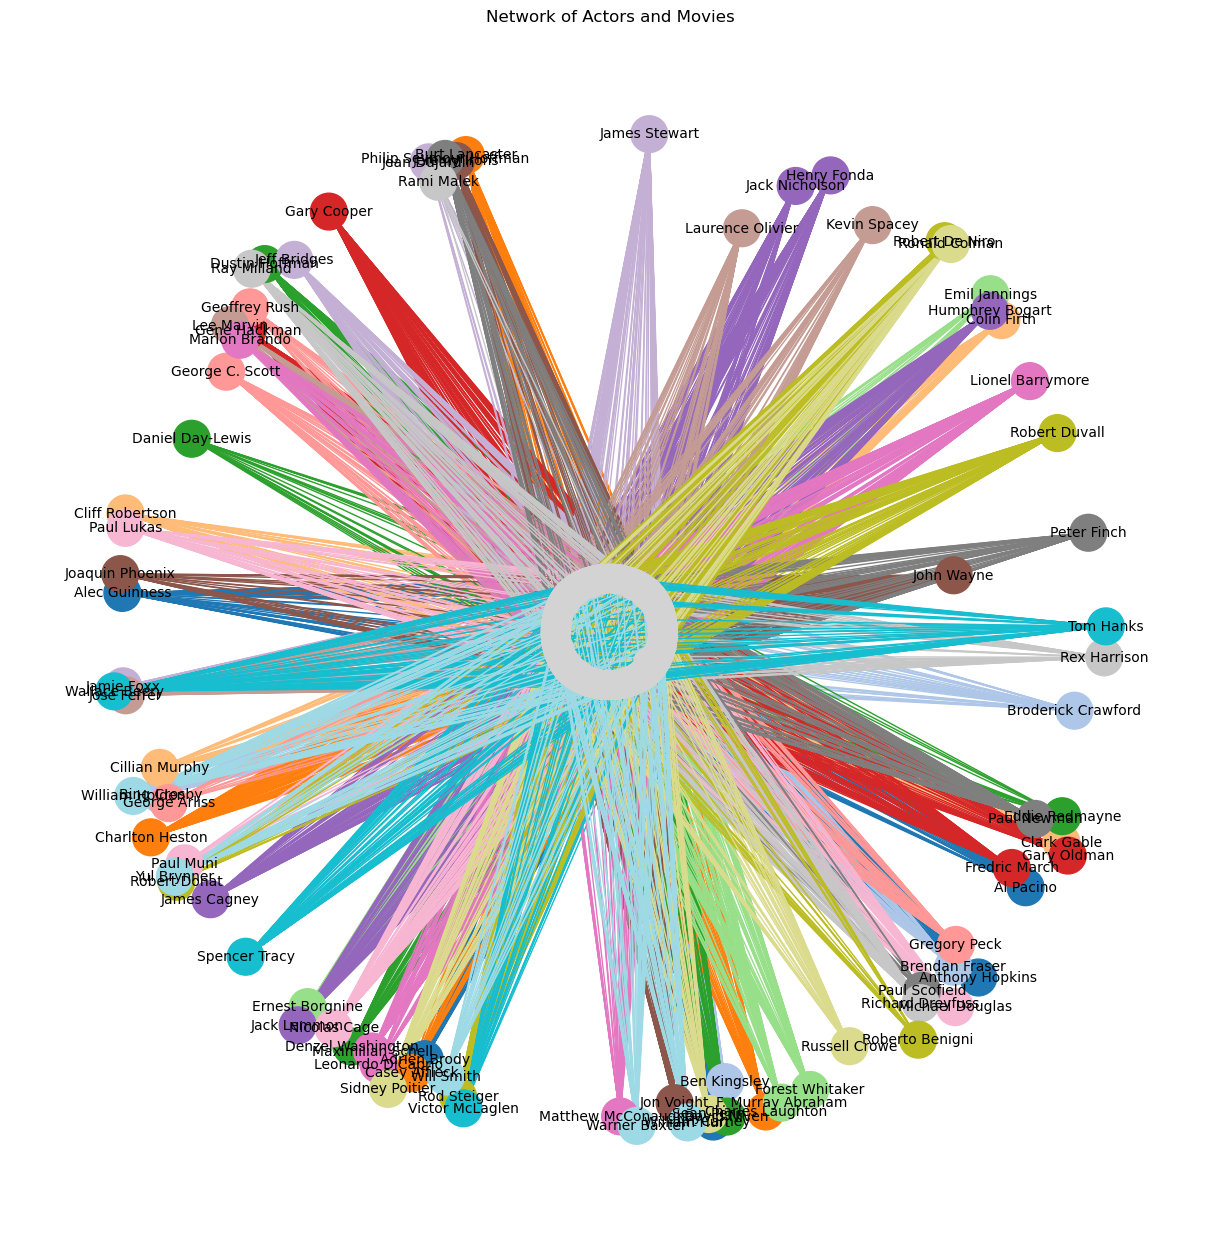

In [55]:
import networkx as nx
import matplotlib.colors as mcolors

# Create a graph
G = nx.Graph()

# Add nodes and edges
colors = plt.cm.tab20(np.linspace(0, 1, len(grouped_by_actor.index.levels[0])))

for i, (actor, group) in enumerate(grouped_by_actor.groupby(level=0)):
    G.add_node(actor, type='actor', color=mcolors.to_hex(colors[i]))
    for _, row in group.iterrows():
        movie = row['Movie name']
        if not G.has_node(movie):
            G.add_node(movie, type='movie', color='#d3d3d3')  # Light gray color for movies
        G.add_edge(actor, movie, color=mcolors.to_hex(colors[i]))

# Adjust the positions of the nodes to improve visibility
pos = nx.spring_layout(G, k=5, iterations=100)

# Separate positions for actors and movies
for node in G.nodes(data=True):
    if node[1]['type'] == 'actor':
        pos[node[0]] = [pos[node[0]][0] * 3, pos[node[0]][1] * 3]  # Spread out actors more
    else:
        pos[node[0]] = [pos[node[0]][0] / 3, pos[node[0]][1] / 3]  # Center movies

# Draw the graph with improved visibility
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, labels={n: n for n, d in G.nodes(data=True) if d['type'] == 'actor'}, 
        node_color=[node[1]['color'] for node in G.nodes(data=True)], 
        edge_color=[edge[2]['color'] for edge in G.edges(data=True)], 
        node_size=[700 if d['type'] == 'actor' else 300 for n, d in G.nodes(data=True)],  # Larger size for actors
        font_size=10)
plt.title('Network of Actors and Movies')
plt.show()


In [56]:
import matplotlib.colors as mcolors
import plotly.graph_objects as go

# Create a graph
G = nx.Graph()

# Add nodes and edges
colors = plt.cm.tab20(np.linspace(0, 1, len(grouped_by_actor.index.levels[0])))

for i, (actor, group) in enumerate(grouped_by_actor.groupby(level=0)):
    G.add_node(actor, type='actor', color=mcolors.to_hex(colors[i]))
    for _, row in group.iterrows():
        movie = row['Movie name']
        if not G.has_node(movie):
            G.add_node(movie, type='movie', color='#d3d3d3')  # Light gray color for movies
        G.add_edge(actor, movie, color=mcolors.to_hex(colors[i]))

# Adjust the positions of the nodes to improve visibility
pos = nx.spring_layout(G, k=10, iterations=200)

# Separate positions for actors and movies
for node in G.nodes(data=True):
    if node[1]['type'] == 'actor':
        pos[node[0]] = [pos[node[0]][0] * 3, pos[node[0]][1] * 3]  # Spread out actors more
    else:
        pos[node[0]] = [pos[node[0]][0] / 3, pos[node[0]][1] / 3]  # Center movies

# Create a plotly figure
fig = go.Figure()

# Add nodes
for node in G.nodes(data=True):
    if node[1]['type'] == 'actor':
        fig.add_trace(go.Scatter(
            x=[pos[node[0]][0]], y=[pos[node[0]][1]],
            mode='markers+text',
            marker=dict(size=10, color=node[1]['color']),
            text=node[0],
            textposition='top center',
            name=node[0]
        ))
    else:
        fig.add_trace(go.Scatter(
            x=[pos[node[0]][0]], y=[pos[node[0]][1]],
            mode='markers',
            marker=dict(size=5, color=node[1]['color']),
            name=node[0]
        ))

# Add edges
for edge in G.edges(data=True):
    fig.add_trace(go.Scatter(
        x=[pos[edge[0]][0], pos[edge[1]][0], None],
        y=[pos[edge[0]][1], pos[edge[1]][1], None],
        mode='lines',
        line=dict(width=0.5, color=edge[2]['color']),
        hoverinfo='none'
    ))

# Update layout for better visibility
fig.update_layout(
    title='Network of Actors and Movies',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    width=1200,  # Increase the width
    height=800   # Increase the height
)

fig.show()

In [57]:
import plotly.express as px

# Count the number of movies each actor has done
actor_movie_counts = grouped_by_actor.groupby(level=0).size().reset_index(name='Movie Count')

# Create a bar chart
fig = px.bar(actor_movie_counts, x='Actor name', y='Movie Count', title='Number of Movies Each Actor Has Done')
fig.update_layout(xaxis_title='Actor', yaxis_title='Number of Movies', xaxis={'categoryorder':'total descending'})
fig.show()

In [58]:
# First, let's get the genres for each actor
genre_by_actor = grouped_by_actor.groupby('Actor name')['Movie genres'].apply(lambda x: ','.join([str(g) for g in x if pd.notna(g)])).reset_index()

# Split the genres string and explode to get one row per genre
genre_by_actor['Movie genres'] = genre_by_actor['Movie genres'].str.split(',')
genre_by_actor = genre_by_actor.explode('Movie genres')

# Clean up genres by stripping whitespace and removing empty strings
genre_by_actor['Movie genres'] = genre_by_actor['Movie genres'].str.strip()
genre_by_actor = genre_by_actor[genre_by_actor['Movie genres'] != '']

# Define genre mappings to group similar genres
genre_mappings = {
    'Drama': ['Drama', 'Family Drama', 'Comedy-drama', 'Melodrama', 'Docudrama'],
    'Comedy': ['Comedy', 'Romantic comedy', 'Comedy-drama', 'Black comedy'],
    'Action/Adventure': ['Action', 'Adventure', 'Action/Adventure', 'Thriller', 'War film'],
    'Crime': ['Crime Fiction', 'Crime film', 'Detective fiction', 'Film noir'],
    'Historical': ['Period piece', 'Historical fiction', 'Biography', 'History'],
    'Romance': ['Romance Film', 'Romantic drama', 'Romantic comedy'],
    'Musical': ['Musical', 'Music film', 'Opera film', 'Concert film'],
    'Horror': ['Horror', 'Supernatural horror', 'Slasher', 'Psychological horror'],
    'Western': ['Western', 'Spaghetti Western', 'Contemporary Western'],
    'SciFi/Fantasy': ['Science Fiction', 'Fantasy', 'Superhero film', 'Space opera'],
    'Documentary': ['Documentary', 'Docudrama', 'Documentary drama'],
    'Animation': ['Animation', 'Anime', 'Stop motion', 'Computer animation'],
    'Other': [] # Will catch any genres not matched above
}

# Map genres to their groups
def map_genre(genre):
    for group, genres in genre_mappings.items():
        if any(g.lower() in genre.lower() for g in genres):
            return group
    return 'Other'

genre_by_actor['Movie genres'] = genre_by_actor['Movie genres'].apply(map_genre)

# Count genres for each actor
genre_counts = genre_by_actor.groupby(['Actor name', 'Movie genres']).size().reset_index(name='count')

# Filter to only include genres that appear frequently
min_appearances = 5
frequent_genres = genre_counts.groupby('Movie genres')['count'].sum().reset_index()
frequent_genres = frequent_genres[frequent_genres['count'] >= min_appearances]['Movie genres']
genre_counts = genre_counts[genre_counts['Movie genres'].isin(frequent_genres)]

# Create a grouped bar chart
fig = px.bar(genre_counts, 
             x='Actor name', 
             y='count',
             color='Movie genres',
             title='Major Film Genres by Oscar-Winning Actor',
             labels={'count': 'Number of Movies', 'Actor name': 'Actor'},
             height=800)

# Update layout for better readability
fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    showlegend=True,
    legend_title='Genre',
    barmode='stack',
    xaxis_tickangle=-45
)

fig.show()

TypeError: string indices must be integers, not 'list'

In [22]:
# Select relevant features and target variable
features = ['Actor age at movie release', 'Movie box office revenue', 'Movie runtime', 'Movie Languages', 'nativeLanguageLabel', 'Movie countries', 'countryOfCitizenshipLabel']
target = 

# Prepare the data
X = oscar_actors_movies[features].dropna()
y = oscar_actors_movies.loc[X.index, target]

# Add a constant to the features (intercept term)
X = sm.add_constant(X)

# Train the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

SyntaxError: invalid syntax (295507794.py, line 3)